In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from IPython.display import Image
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
%matplotlib inline

In [2]:
training = pd.read_csv(r"C:\Users\Input Files\training.csv", engine='python')

## Methodology

In order to solve this problem, I will build two machine learning models, one that predicts purchase price of the diamond and one that predicts the final retail price. These will be regression models and I will test several different regression techniques to find the best one to use. Finally I will predict the price and retail price of each diamond in the offers dataset and chose diamonds based on the difference (profit)

## Data Cleaning

In [3]:
training.head() #taking a look at the dataset

,Unnamed: 0,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail
0,2,0.41,NaN,SI1,L,,65.4,None,False,4.65x4.62x3.03,Very good,Other/Unknown,Princess,Good,NaN,1,$ 430,$ 850
1,3,0.42,AGSL,SI2,L,,61.7,Strong Bl..,False,4.85x4.79x2.98,Excellent,Russia,Marquise,Very good,NaN,1,$ 560,$ 920
2,4,0.40,AGSL,SI1,L,,64.0,None,False,4.66x4.63x2.97,Excellent,South Africa,Round,Excellent,57.0,1,$ 560,$ 575
3,5,0.41,AGSL,SI2,L,,62.7,Strong Bl..,False,4.71x4.69x2.95,Very good,Botswana,Round,Very good,58.0,1,$ 560,$ 825
4,10,0.40,AGSL,SI1,L,,63.0,NaN,False,4.71x4.68x2.96,Excellent,Botswana,Round,Very good,58.0,1,$ 580,$ 890


In [4]:
training.drop(["Unnamed: 0"],axis=1, inplace = True) #don't need this column

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 17 columns):
Carats                    8050 non-null float64
Cert                      7498 non-null object
Clarity                   8050 non-null object
Color                     8050 non-null object
Cut                       8050 non-null object
Depth                     6610 non-null float64
Fluroescence              6900 non-null object
Known_Conflict_Diamond    8050 non-null bool
Measurements              8050 non-null object
Polish                    8050 non-null object
Regions                   8050 non-null object
Shape                     8050 non-null object
Symmetry                  8050 non-null object
Table                     5519 non-null float64
Vendor                    8050 non-null int64
Price                     8050 non-null object
Retail                    8050 non-null object
dtypes: bool(1), float64(3), int64(1), object(12)
memory usage: 1014.2+ KB


I know that cert, depth, fluroescence, and table have missing values

In [6]:
cols = training.columns
print('Number of Unique Values for each feature: ')
print(' ')
for i in cols:
    print(i + ': ' + str(training[i].nunique()))

Number of Unique Values for each feature: 
 
Carats: 393
Cert: 2
Clarity: 13
Color: 32
Cut: 6
Depth: 115
Fluroescence: 13
Known_Conflict_Diamond: 2
Measurements: 7509
Polish: 4
Regions: 9
Shape: 14
Symmetry: 7
Table: 22
Vendor: 4
Price: 3903
Retail: 4618


## Individual column cleaning

## Carats

The weight of the diamond in carats

Does not need any cleaning, there are no NA's and the data is already in float form

## Cert

The organization that certified the diamond

Has Null values, but no mispellings or anything, I will revisit Nulls later on

In [7]:
training.Cert.value_counts()

AGSL     6973
GemEx     525
Name: Cert, dtype: int64

## Clarity

The code for the clarity of the diamond (A measure of the position and size of inclusions in the diamond)

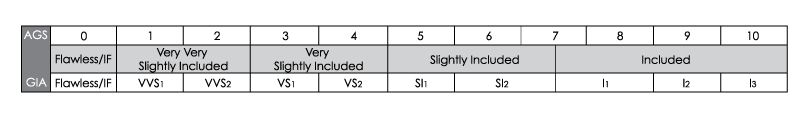

In [8]:
Image(r"C:\Users\Images\Clarity Guide.png")

In [9]:
training.Clarity.value_counts() #This has a none

SI2     2208
SI1     2168
VS2     1569
VS1     1130
VVS2     448
VVS1     239
IF       137
I1       132
I2        13
FL         2
N          2
I3         1
None       1
Name: Clarity, dtype: int64

According to the Clarity guide above, N is not a valid input and neither is None. Additionally, IF is equal to FL.

In [10]:
training.Clarity.replace('FL', 'IF',inplace=True)
training.Clarity.replace('None', np.NaN,inplace=True)
training.Clarity.replace('I1', 'Included',inplace=True)
training.Clarity.replace('I2', 'Included',inplace=True)
training.Clarity.replace('I3', 'Included',inplace=True)
training.Clarity.replace('None', np.NaN,inplace=True)
training.Clarity.replace('N', np.NaN,inplace=True)

Clarity has a natural order to it and it is easy to see which is greater than the previous so in order to reduce prediction factors I will convert these to numbers.

In [11]:
training.Clarity.replace('IF', 8,inplace=True)
training.Clarity.replace('VVS1', 7,inplace=True)
training.Clarity.replace('VVS2', 6,inplace=True)
training.Clarity.replace('VS1', 5,inplace=True)
training.Clarity.replace('VS2', 4,inplace=True)
training.Clarity.replace('SI1', 3,inplace=True)
training.Clarity.replace('SI2', 2,inplace=True)
training.Clarity.replace('Included', 1,inplace=True)

In [12]:
training.Clarity.value_counts() #Non only correct descriptors remain, will replace NA's later

2.0    2208
3.0    2168
4.0    1569
5.0    1130
6.0     448
7.0     239
1.0     146
8.0     139
Name: Clarity, dtype: int64

## Color

The code for the color of the diamond

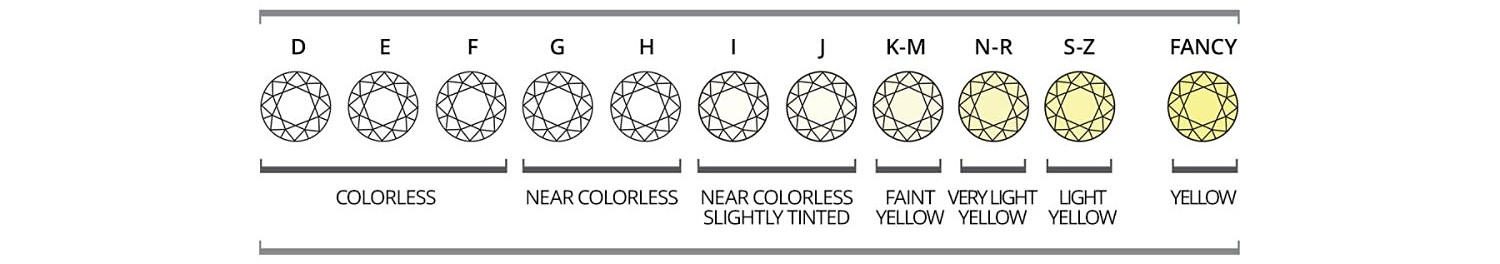

In [13]:
Image(r"C:\Users\Images\color guide.jpg")

In [14]:
training.Color.value_counts()

G            1188
I            1158
H            1092
E            1042
F            1000
J             843
D             816
K             540
L             259
M              85
Ffcdbrown       2
Ffg             2
N               2
Fvyellow        2
Fdy             2
S               1
W               1
Fly             1
Fdpink          1
P               1
U               1
O-p             1
Fiyellow        1
Flyellow        1
Gy              1
Ffcg            1
Ffcly           1
Fyellow         1
Q-r             1
Fiy             1
Lb              1
Ffcy            1
Name: Color, dtype: int64

In [15]:
training.Color.replace('Fvyyelloww', 'Colored',inplace=True)
training.Color.replace('Fly', 'Colored',inplace=True)
training.Color.replace('Flyellow', 'Colored',inplace=True)
training.Color.replace('Fyellow', 'Colored',inplace=True)
training.Color.replace('Ffcly', 'Colored',inplace=True)
training.Color.replace('Fiy', 'Colored',inplace=True)
training.Color.replace('Fiyellow', 'Colored',inplace=True)
training.Color.replace('Fvyellow', 'Colored',inplace=True)
training.Color.replace('Fdy', 'Colored',inplace=True)
training.Color.replace('Ffg', 'Colored',inplace=True)
training.Color.replace('N', 'Colored',inplace=True)
training.Color.replace('U', 'Colored',inplace=True)
training.Color.replace('P', 'Colored',inplace=True)
training.Color.replace('S', 'Colored',inplace=True)
training.Color.replace('W', 'Colored',inplace=True)
training.Color.replace('Ffcg', 'Colored',inplace=True)
training.Color.replace('Ffcy', 'Colored',inplace=True)
training.Color.replace('O-p', 'Colored',inplace=True)
training.Color.replace('Ffcdbrown', 'Colored',inplace=True)
training.Color.replace('Lb', 'Colored',inplace=True)
training.Color.replace('Q-r', 'Colored',inplace=True)
training.Color.replace('Gy', 'Colored',inplace=True)
training.Color.replace('Fdpink', 'Colored',inplace=True)
training.Color.replace('M', 'Colored',inplace=True)
training.Color.replace('N', 'Colored',inplace=True)
training.Color.replace('K', 'Colored',inplace=True)
training.Color.replace('L', 'Colored',inplace=True)

In [16]:
training.Color.value_counts() #easier to manage, groups strange colors into one bin

G          1188
I          1158
H          1092
E          1042
F          1000
Colored     911
J           843
D           816
Name: Color, dtype: int64

## Cut

The quality of the cut of the diamond

In [17]:
training.Cut.value_counts() #This one has a lot of blanks

             3922
Excellent    2811
Very good    1123
Good          178
Fair           15
Ideal           1
Name: Cut, dtype: int64

In [18]:
training.Cut.replace(' ', np.nan,inplace=True) #replaces blanks with Nas will deal with those later

Cut also has a natural order to it and it is easy to see which is greater than the previous so in order to reduce prediction factors I will convert these to numbers

In [19]:
training.Cut.replace('Excellent', 4,inplace=True)
training.Cut.replace('Very good', 3,inplace=True)
training.Cut.replace('Good', 2,inplace=True)
training.Cut.replace('Fair', 1,inplace=True)
training.Cut.replace('Ideal', 5,inplace=True)

In [20]:
training.Cut.value_counts()

4.0    2811
3.0    1123
2.0     178
1.0      15
5.0       1
Name: Cut, dtype: int64

## Depth

The depth percentage of the diamond

Has Null values, but no mispellings or anything, I will revisit Nulls later on

## Fluroescence

The level of fluroescence of the diamond

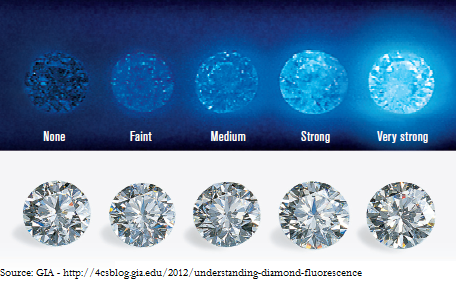

In [21]:
Image(r"C:\Users\Images\fluorescence.png")

In [22]:
training.Fluroescence.value_counts()#This one has blanks, also a lot of these do not make sense, will have to clean up.
#For Fluroescence None is a valid input

None           4178
Faint          1280
Medium          400
Medium Bl..     320
                295
Strong          208
Strong Bl..     196
Very Stro..       6
Very Smal..       6
Medium B          6
Medium Ye..       3
Strong B          1
Faint Y           1
Name: Fluroescence, dtype: int64

In [23]:
training.Fluroescence.replace(' ', np.nan,inplace=True) #replaces blanks with Nas will deal with those later
training.Fluroescence.replace('Medium Bl..', 'Medium',inplace=True)
training.Fluroescence.replace('Strong Bl..', 'Strong',inplace=True)
training.Fluroescence.replace('Medium B', 'Medium',inplace=True)
training.Fluroescence.replace('Medium Ye..', 'Medium',inplace=True)
training.Fluroescence.replace('Very Stro..', 'Very Strong',inplace=True)
training.Fluroescence.replace('Faint Y', 'Faint',inplace=True)
training.Fluroescence.replace('Strong B', 'Strong',inplace=True)
training.Fluroescence.replace('Very Smal..', 'Faint',inplace=True) #Best Estimation

Fluroescence also has a natural order to it and it is easy to see which is greater than the previous so in order to reduce prediction factors I will convert these to numbers

In [24]:
training.Fluroescence.replace('Very Strong', 5,inplace=True)
training.Fluroescence.replace('Strong', 4,inplace=True)
training.Fluroescence.replace('Medium', 3,inplace=True)
training.Fluroescence.replace('Faint', 2,inplace=True)
training.Fluroescence.replace('None', 1,inplace=True)

In [25]:
training.Fluroescence.value_counts()

1.0    4178
2.0    1287
3.0     729
4.0     405
5.0       6
Name: Fluroescence, dtype: int64

## Conflict Diamond

A flag identifying if the diamond was known to have been illegally traded

In [26]:
training.drop(["Known_Conflict_Diamond"],axis=1, inplace = True)#Dropping because the offers dataset is missing more that 60% of values for this feature

Simple Boolean, no problems here

## Measurements

The length x width x depth of the diamond expressed in millimeters

Going to split this into 3 columns

In [27]:
def replace_char(string):
    s = string.replace("+","x")
    s = s.replace("-","x")
    s = s.replace("*","x")
    s = s.replace("X","x")
    s = s.replace('+',"x")
    s = s.replace("-","x")
    s = s.replace("*","x")
    s = s.replace("X","x")
    return s

Creating 3 functions to split up the measurements column

In [28]:
def split(string):
    s = replace_char(string)
    t = s.split('x')[0]
    return t
def split2(string):
    s = replace_char(string)
    t = s.split('x')[1]
    return t
def split3(string):
    s = replace_char(string)
    t = s.split('x')[2]
    return t

In [29]:
training['l'] = training['Measurements'].apply(split)
training['w'] = training['Measurements'].apply(split2)
training['d'] = training['Measurements'].apply(split3)

In [30]:
training['l'] = training['l'].apply(pd.to_numeric, errors='coerce')
training['w'] = training['w'].apply(pd.to_numeric, errors='coerce')
training['d'] = training['d'].apply(pd.to_numeric, errors='coerce')

In [31]:
training.drop(["Measurements"],axis=1, inplace = True) #no longer need the measurments column

## Polish

The quality of the polish of the diamond

In [32]:
training.Polish.value_counts() #Has Blanks

Excellent    5383
Very good    1589
              899
Good          179
Name: Polish, dtype: int64

In [33]:
training.Polish.replace(' ', np.nan,inplace=True) #replaces blanks with Nas will deal with those later

In [34]:
training.Polish.replace('Good', 2,inplace=True)
training.Polish.replace('Very good', 3,inplace=True)
training.Polish.replace('Excellent', 4,inplace=True)
training.Polish.replace('Fair', 1,inplace=True)

Polish also has a natural order to it and it is easy to see which is greater than the previous so in order to reduce prediction factors I will convert these to numbers

In [35]:
training.Polish.value_counts()

4.0    5383
3.0    1589
2.0     179
Name: Polish, dtype: int64

## Regions

The region from which the diamond originated

In [36]:
training.Regions.value_counts()

Russia           2599
Botswana         1438
Australia         887
DR Congo          796
Canada            745
Angola            586
South Africa      556
Other/Unknown     303
Zimbabwe          140
Name: Regions, dtype: int64

Don't see any issues here

## Shape

The shape the diamond was cut into

In [37]:
training.Shape.value_counts() #Has Round and ROUND, Marquise, Marquise, and Marquis, Oval and Oval with a space

Round       4505
Princess     754
Oval         560
Emerald      554
Radiant      481
Pear         336
Marquise     241
Asscher      194
ROUND        123
Oval         105
Cushion       87
Marwuise      43
Uncut         38
Marquis       29
Name: Shape, dtype: int64

In [38]:
training.Shape.replace('ROUND', 'Round',inplace=True)
training.Shape.replace('Oval ', 'Oval',inplace=True)
training.Shape.replace('Marwuise', 'Marquise',inplace=True)
training.Shape.replace('ROUND', 'Round',inplace=True)
training.Shape.replace('Marquis', 'Marquise',inplace=True)

In [39]:
training.Shape.value_counts()

Round       4628
Princess     754
Oval         665
Emerald      554
Radiant      481
Pear         336
Marquise     313
Asscher      194
Cushion       87
Uncut         38
Name: Shape, dtype: int64

## Symmetry

The quality of the symmetry of the diamond

In [40]:
training.Symmetry.value_counts()

Excellent    4759
Very good    1980
              899
Good          392
Fair           16
Faint           3
Execllent       1
Name: Symmetry, dtype: int64

In [41]:
training.Symmetry.replace(' ', np.nan,inplace=True) #replaces blanks with Nas will deal with those later
training.Symmetry.replace('Execllent', 'Excellent',inplace=True)

Symmetry also has a natural order to it and it is easy to see which is greater than the previous so in order to reduce prediction factors I will convert these to numbers

In [42]:
training.Symmetry.replace('Excellent', 5,inplace=True)
training.Symmetry.replace('Very good', 4,inplace=True)
training.Symmetry.replace('Good', 3,inplace=True)
training.Symmetry.replace('Fair', 2,inplace=True)
training.Symmetry.replace('Faint', 1,inplace=True)

In [43]:
training.Symmetry.value_counts()

5.0    4760
4.0    1980
3.0     392
2.0      16
1.0       3
Name: Symmetry, dtype: int64

## Table

The table percentage of the diamond

Has Null values, but no mispellings or anything, I will revisit Nulls later on

In [44]:
training['Table'] = training['Table'].apply(pd.to_numeric, errors='coerce')

## Vendor

The vendor selling the diamond

These should really be categorical. Vendor 1 is not < Vendor 2 < Vendor 3 for example

In [45]:
training.Vendor.replace(1, 'A',inplace=True)
training.Vendor.replace(2, 'B',inplace=True)
training.Vendor.replace(3, 'C',inplace=True)
training.Vendor.replace(4, 'D',inplace=True)

## Price and Retail

The price that you pay for the diamond and the price that it retails for after reselling. These need to be numerics.

In [46]:
training.Price

0           $ 430
1           $ 560
2           $ 560
3           $ 560
4           $ 580
5           $ 580
6           $ 580
7           $ 585
8           $ 585
9           $ 585
10          $ 590
11          $ 595
12          $ 595
13          $ 600
14          $ 600
15          $ 600
16          $ 600
17          $ 600
18          $ 605
19          $ 605
20          $ 610
21          $ 610
22          $ 610
23          $ 610
24          $ 615
25          $ 615
26          $ 615
27          $ 615
28          $ 615
29          $ 620
          ...    
8020      $ 2,035
8021      $ 1,470
8022     $ 17,930
8023     $ 15,650
8024     $ 28,830
8025     $ 28,360
8026     $ 16,735
8027     $ 24,160
8028      $ 1,070
8029        $ 880
8030        $ 740
8031      $ 6,920
8032      $ 5,620
8033      $ 5,525
8034      $ 5,005
8035      $ 5,490
8036      $ 5,005
8037      $ 4,390
8038      $ 4,875
8039     $ 27,245
8040     $ 36,230
8041      $ 6,640
8042      $ 8,625
8043     $ 16,675
8044     $

In [47]:
test = training.copy()

In [48]:
def replace_dollar(string):
    #s = re.sub ('\*', 'x', string)
    #s = re.sub ('\+', 'x', string)
    #s = re.sub ('\-', 'x', string)
    s = string.replace("$","")
    s = s.replace(",","")
    return s

In [49]:
test.Price = test.Price.apply(replace_dollar)

In [50]:
training['Price'] = training['Price'].apply(replace_dollar)
training['Price']= training['Price'].str.strip()
training['Price'] = training['Price'].apply(pd.to_numeric, errors='coerce')
training['Retail'] = training['Retail'].apply(replace_dollar)
training['Retail']= training['Retail'].str.strip()
training['Retail'] = training['Retail'].apply(pd.to_numeric, errors='coerce')

## Short Answer Questions

## 1) Is one Vendor overcharging for diamonds?

In [51]:
vendorA = training[training['Vendor'].str.contains('A') == True]
vendorB = training[training['Vendor'].str.contains('B') == True]
vendorC = training[training['Vendor'].str.contains('C') == True]
vendorD = training[training['Vendor'].str.contains('D') == True]
vendorA['Profit'] = vendorA['Retail'] - vendorA['Price']
vendorB['Profit'] = vendorB['Retail'] - vendorB['Price']
vendorC['Profit'] = vendorC['Retail'] - vendorC['Price']
vendorD['Profit'] = vendorD['Retail'] - vendorD['Price']

C:\Users\bdraus\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\bdraus\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bdraus\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [52]:
print('Vender 1')
print()
print('Number of Diamonds Purchased: '+ str(vendorA.Profit.count()))
print('Mean: '+ str(vendorA.Profit.mean()))
print('Median: '+ str(vendorA.Profit.median()))
print('Min: '+ str(vendorA.Profit.min()))
print('Max: '+ str(vendorA.Profit.max()))
print()

print('Vender 2')
print()
print('Number of Diamonds Purchased: '+ str(vendorB.Profit.count()))
print('Mean: '+ str(vendorB.Profit.mean()))
print('Median: '+ str(vendorB.Profit.median()))
print('Min: '+ str(vendorB.Profit.min()))
print('Max: '+ str(vendorB.Profit.max()))
print()

print('Vender 3')
print()
print('Number of Diamonds Purchased: '+ str(vendorC.Profit.count()))
print('Mean: '+ str(vendorC.Profit.mean()))
print('Median: '+ str(vendorC.Profit.median()))
print('Min: '+ str(vendorC.Profit.min()))
print('Max: '+ str(vendorC.Profit.max()))
print()

print('Vender 4')
print()
print('Number of Diamonds Purchased: '+ str(vendorD.Profit.count()))
print('Mean: '+ str(vendorD.Profit.mean()))
print('Median: '+ str(vendorD.Profit.median()))
print('Min: '+ str(vendorD.Profit.min()))
print('Max: '+ str(vendorD.Profit.max()))
print()

Vender 1

Number of Diamonds Purchased: 2702
Mean: 1240.5292376017765
Median: 950.0
Min: -5800
Max: 7695

Vender 2

Number of Diamonds Purchased: 3241
Mean: 12001.488738043814
Median: 6000.0
Min: -673680
Max: 587405

Vender 3

Number of Diamonds Purchased: 1106
Mean: 5014.303797468355
Median: 4970.0
Min: -23545
Max: 18600

Vender 4

Number of Diamonds Purchased: 1001
Mean: 5140.7442557442555
Median: 4980.0
Min: -36140
Max: 25590



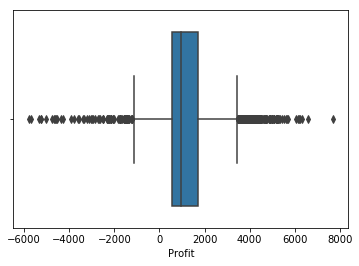

In [53]:
A = sns.boxplot(x=vendorA["Profit"])


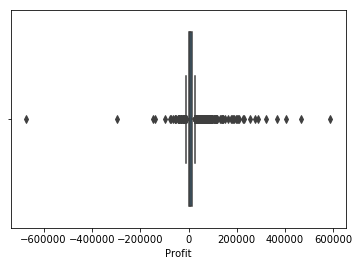

In [54]:
B = sns.boxplot(x=vendorB["Profit"])

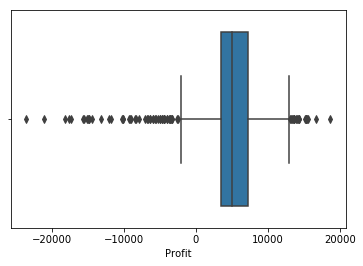

In [55]:
C = sns.boxplot(x=vendorC["Profit"])

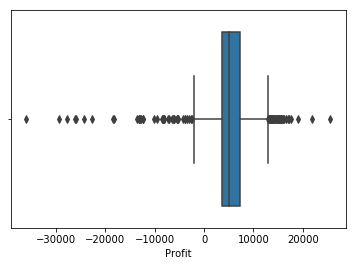

In [56]:
D = sns.boxplot(x=vendorD["Profit"])

I would say that generally Vendor 1 overcharged more than the others for diamonds, they are the only one with a median below 1000, they also have a mean below 1,500 The 25th percentile and the 75th percentile are also both under 2,000 profit. This tells me that the majority of their data is below the 2,000 profit mark and there is less arbitrage opportunity when reselling their diamonds. However, their losses are also not huge. The biggest loss for Vendor 1 was only 5,800. When looking at Vendor 2 it is the one with the greatest variance between retail price and purchases prices with really huge tails in both directions. Vendor 1 is the most likely to overcharge.

## 2) What is the Correlation between Carat and Retail Price? Why do you think this forms?

In [57]:
data = training[['Carats','Retail']]

In [58]:
data.corr()

,Carats,Retail
Carats,1.000000,0.716281
Retail,0.716281,1.000000


Carat has a 72% correlation with Diamond Retail Price. Carat is the weight of the diamond, the heavier the diamond, generally the larger it is. People pay more for large imposing diamonds, they want it to be seen and stand out. This is why Carats are so highly correlated with Retail Price.

## Dealing with Missing Values

Recall that columns cert, depth, fluroescence, and table have missing values

,Total,Percent
Cut,3922,48.720497
Table,2531,31.440994
Fluroescence,1445,17.950311
Depth,1440,17.888199
Polish,899,11.167702
Symmetry,899,11.167702
Cert,552,6.857143
Clarity,3,0.037267


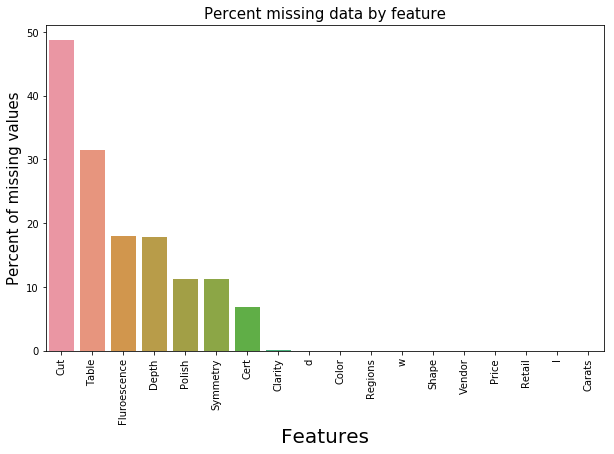

In [59]:
total = training.isnull().sum().sort_values(ascending=False)
percent = (training.isnull().sum()/training.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head(8)

The Chart and table above tells me that Cut has 49% of its data missing and Cert is about 7% missing for example

I am going to look at non categorical data first, this includes table and depth. For non categorical data, I am going to use the mean to replace missing values. For actual non categorical data, I will use the mean within one standard deviation. For categorical data that I converted to numerics (cut, Fluroescence, etc) I will only use the mean because I do not want a number above the highest value because that doesn't make sense in this context. 

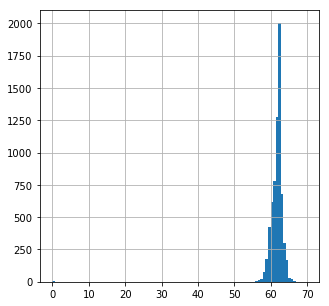

In [60]:
p = training.Depth.hist(figsize = (5,5),bins=100)  #Plotting a histogram to examine the distribution

so it looks like this data is left skewed with an outlier at 0, this tells me that 0 is potentially also a Null value, which makes sense considering depth is a % value. I am going to make 0's Null and replot this Histogram

In [61]:
training.Depth.replace(0,np.NaN,inplace=True)

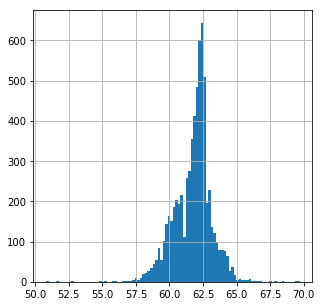

In [62]:
p = training.Depth.hist(figsize = (5,5),bins=100)  #rexamining distribution

In [63]:
mean = training.Depth.mean()
std = training.Depth.std()
med = training.Depth.median()
mode = training.Depth.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

Mean: 61.77009841029522
Median: 62.0
Mode: 0    62.4
dtype: float64
Standard Deviation: 1.3875705293642575


Replacing Nulls with data within one std of mean

In [64]:
Column_Name_avg = training['Depth'].mean()
Column_Name_std = training['Depth'].std()
Column_Name_null_count = training['Depth'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
training['Depth'][np.isnan(training['Depth'])] = Column_Name_null_random_list
training['Depth'] = training['Depth'].astype(float)

C:\Users\bdraus\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


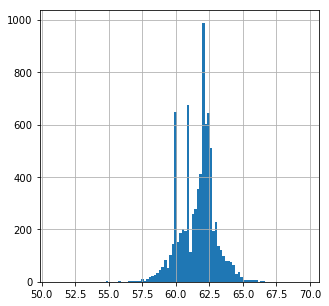

In [65]:
p = training.Depth.hist(figsize = (5,5),bins=100)  #New Distribution

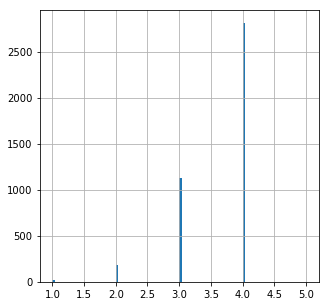

In [66]:
p = training.Cut.hist(figsize = (5,5),bins=100)

In [67]:
mean = training.Cut.mean()
std = training.Cut.std()
med = training.Cut.median()
mode = training.Cut.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))
training.Cut.fillna(training.Cut.mean(),inplace=True)

Mean: 3.6310562015503876
Median: 4.0
Mode: 0    4.0
dtype: float64
Standard Deviation: 0.5843236394079256


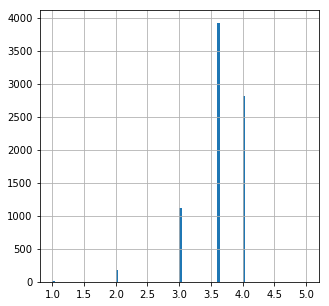

In [68]:
p = training.Cut.hist(figsize = (5,5),bins=100)

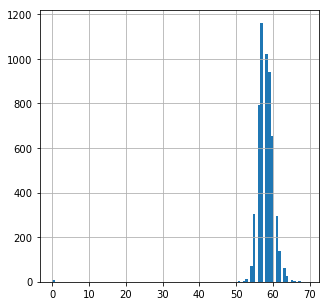

In [69]:
p = training.Table.hist(figsize = (5,5),bins=100)  #Plotting a histogram to examine the distribution

We see the same thing happening with Table Percentage where 0 is Null

In [70]:
training.Table.replace(0,np.NaN,inplace=True)

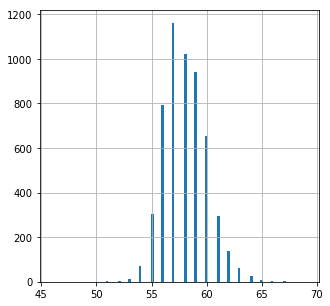

In [71]:
p = training.Table.hist(figsize = (5,5),bins=100)  #rexamining distribution

Again this is a pretty normal distribution

In [72]:
mean = training.Table.mean()
std = training.Table.std()
med = training.Table.median()
mode = training.Table.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

Mean: 58.04664246823956
Median: 58.0
Mode: 0    57.0
dtype: float64
Standard Deviation: 1.9571101313864592


In [73]:
Column_Name_avg = training['Table'].mean()
Column_Name_std = training['Table'].std()
Column_Name_null_count = training['Table'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
training['Table'][np.isnan(training['Table'])] = Column_Name_null_random_list
training['Table'] = training['Table'].astype(float)

C:\Users\bdraus\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


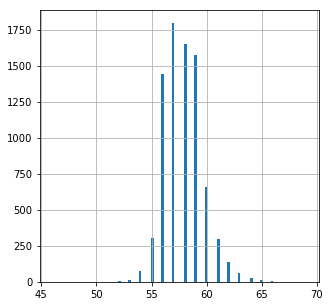

In [74]:
p = training.Table.hist(figsize = (5,5),bins=100) #new distribution for Table

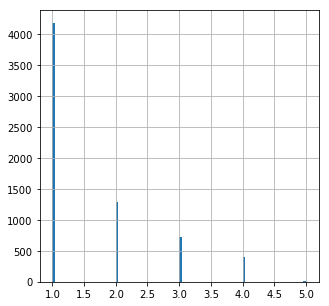

In [75]:
p = training.Fluroescence.hist(figsize = (5,5),bins=100)

In [76]:
mean = training.Fluroescence.mean()
std = training.Fluroescence.std()
med = training.Fluroescence.median()
mode = training.Fluroescence.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

training.Fluroescence.fillna(training.Fluroescence.mean(),inplace=True)

Mean: 1.6031794095382286
Median: 1.0
Mode: 0    1.0
dtype: float64
Standard Deviation: 0.9159840812639104


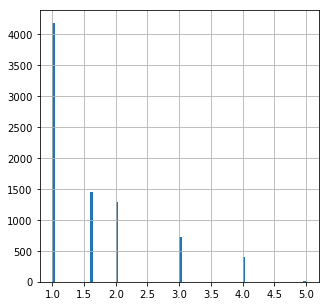

In [77]:
p = training.Fluroescence.hist(figsize = (5,5),bins=100)

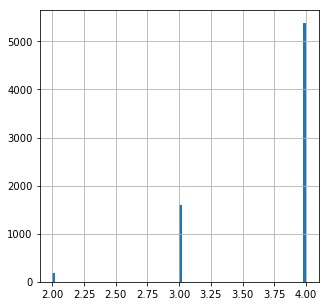

In [78]:
p = training.Polish.hist(figsize = (5,5),bins=100)

In [79]:
mean = training.Polish.mean()
std = training.Polish.std()
med = training.Polish.median()
mode = training.Polish.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

training.Polish.fillna(training.Polish.mean(),inplace=True)

Mean: 3.7277303873584113
Median: 4.0
Mode: 0    4.0
dtype: float64
Standard Deviation: 0.49823339156834556


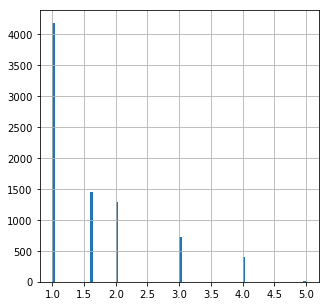

In [80]:
p = training.Fluroescence.hist(figsize = (5,5),bins=100) #reaximining distribution

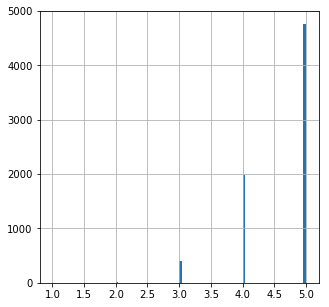

In [81]:
p = training.Symmetry.hist(figsize = (5,5),bins=100)

In [82]:
mean = training.Symmetry.mean()
std = training.Symmetry.std()
med = training.Symmetry.median()
mode = training.Symmetry.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

training.Symmetry.fillna(training.Symmetry.mean(),inplace=True)

Mean: 4.60509019717522
Median: 5.0
Mode: 0    5.0
dtype: float64
Standard Deviation: 0.6058888998787025


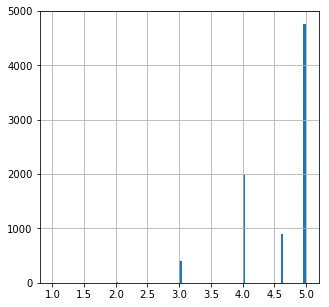

In [83]:
p = training.Symmetry.hist(figsize = (5,5),bins=100) #reaximining distribution

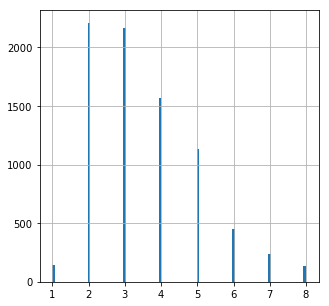

In [84]:
p = training.Clarity.hist(figsize = (5,5),bins=100)

In [85]:
mean = training.Clarity.mean()
std = training.Clarity.std()
med = training.Clarity.median()
mode = training.Clarity.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

training.Clarity.fillna(training.Clarity.mean(),inplace=True)

Mean: 3.537343109233255
Median: 3.0
Mode: 0    2.0
dtype: float64
Standard Deviation: 1.4910674622370108


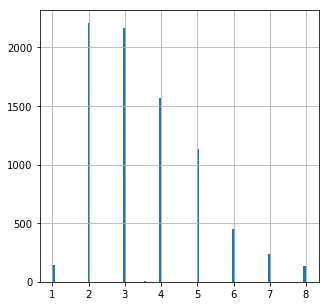

In [86]:
p = training.Clarity.hist(figsize = (5,5),bins=100)

In [87]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 18 columns):
Carats          8050 non-null float64
Cert            7498 non-null object
Clarity         8050 non-null float64
Color           8050 non-null object
Cut             8050 non-null float64
Depth           8050 non-null float64
Fluroescence    8050 non-null float64
Polish          8050 non-null float64
Regions         8050 non-null object
Shape           8050 non-null object
Symmetry        8050 non-null float64
Table           8050 non-null float64
Vendor          8050 non-null object
Price           8050 non-null int64
Retail          8050 non-null int64
l               8050 non-null float64
w               8050 non-null float64
d               8050 non-null float64
dtypes: float64(11), int64(2), object(5)
memory usage: 1.1+ MB


In [88]:
training.columns

Index(['Carats', 'Cert', 'Clarity', 'Color', 'Cut', 'Depth', 'Fluroescence',
       'Polish', 'Regions', 'Shape', 'Symmetry', 'Table', 'Vendor', 'Price',
       'Retail', 'l', 'w', 'd'],
      dtype='object')

Next I will examine missing Categorical features and their distributions

C:\Users\bdraus\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


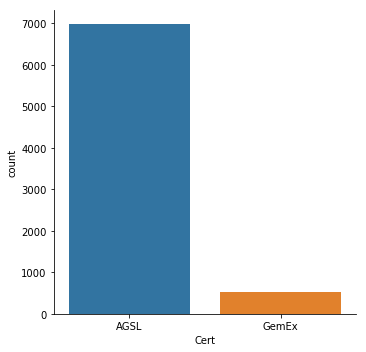

In [89]:
p = sns.factorplot(x='Cert', data=training , kind='count',aspect=1 )

You can see that AGSL is far more frequent than GemEx so I fill will missing values with the mode.

In [90]:
training['Cert'] = training['Cert'].fillna(training.Cert.mode().iloc[0])

In [91]:
training.info() # All data is non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8050 entries, 0 to 8049
Data columns (total 18 columns):
Carats          8050 non-null float64
Cert            8050 non-null object
Clarity         8050 non-null float64
Color           8050 non-null object
Cut             8050 non-null float64
Depth           8050 non-null float64
Fluroescence    8050 non-null float64
Polish          8050 non-null float64
Regions         8050 non-null object
Shape           8050 non-null object
Symmetry        8050 non-null float64
Table           8050 non-null float64
Vendor          8050 non-null object
Price           8050 non-null int64
Retail          8050 non-null int64
l               8050 non-null float64
w               8050 non-null float64
d               8050 non-null float64
dtypes: float64(11), int64(2), object(5)
memory usage: 1.1+ MB


## Create Dummy Variables for Categorical Data

I know that when doing Machine Learning it is a lot easier for all the variables to be in numeric form. Therefore, I must create dummy variables for each of the categorical features. There are two ways to create dummy variables, the first is Integer encoding which works well if the categories are ordinal (Middle School< High School < Undegrad, etc). The second is One Hot Encoding which works best when the features are nominal, meaning there is no number relationship between the values (ex: red is not greater than blue or less than yellow). For this problem, I will be using One Hot Encoding because I want to assume that one color is not better than the other or one shape is not better than another.

In [92]:
cats = ['Cert','Color','Regions','Shape','Vendor']

In [93]:
dummies = pd.get_dummies(training[cats])

In [94]:
merged = pd.concat([training,dummies], axis='columns')

In [95]:
merged.drop(cats,axis=1, inplace = True)

## Data Scaling

next I want to scale the data so it easier to compare across features

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scale = StandardScaler()

In [98]:
cols = ['Carats', 'Clarity', 'Cut', 'Depth', 'Fluroescence', 'Polish',
       'Symmetry', 'Table','l', 'w', 'd']

In [99]:
num_feats =  pd.DataFrame(scale.fit_transform(merged[cols]),
                           columns=cols,index=merged.index)

In [100]:
num_feats.head() #puts all the features on the same scale

,Carats,Clarity,Cut,Depth,Fluroescence,Polish,Symmetry,Table,l,w,d
0,-0.956724,-0.360464,0.0,2.817580,-0.727031,-1.549825,-2.810939,0.642913,-1.479575,-1.497445,-1.305272
1,-0.945545,-1.031292,0.0,0.049123,2.888963,0.579844,-1.059673,0.642913,-1.331469,-1.372832,-1.365727
2,-0.967903,-0.360464,0.0,1.770056,-0.727031,0.579844,0.691592,-0.495674,-1.472170,-1.490115,-1.377818
3,-0.956724,-1.031292,0.0,0.797355,2.888963,-1.549825,-1.059673,0.073619,-1.435143,-1.446134,-1.402000
4,-0.967903,-0.360464,0.0,1.021824,0.000000,0.579844,-1.059673,0.073619,-1.435143,-1.453464,-1.389909


In [101]:
merged_stand = merged.copy()
merged_stand[cols] = num_feats[cols] #combining the new standardized numeric features with the categorical data

In [102]:
merged_stand.head()

,Carats,Clarity,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Price,Retail,...,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_A,Vendor_B,Vendor_C,Vendor_D
0,-0.956724,-0.360464,0.0,2.817580,-0.727031,-1.549825,-2.810939,0.642913,430,850,...,0,0,1,0,0,0,1,0,0,0
1,-0.945545,-1.031292,0.0,0.049123,2.888963,0.579844,-1.059673,0.642913,560,920,...,0,0,0,0,0,0,1,0,0,0
2,-0.967903,-0.360464,0.0,1.770056,-0.727031,0.579844,0.691592,-0.495674,560,575,...,0,0,0,0,1,0,1,0,0,0
3,-0.956724,-1.031292,0.0,0.797355,2.888963,-1.549825,-1.059673,0.073619,560,825,...,0,0,0,0,1,0,1,0,0,0
4,-0.967903,-0.360464,0.0,1.021824,0.000000,0.579844,-1.059673,0.073619,580,890,...,0,0,0,0,1,0,1,0,0,0


In [103]:
price_stand= merged_stand.copy()
retail_stand= merged_stand.copy()
price_stand.drop(['Retail'],axis='columns',inplace=True) #dropping retail for now to focus on Price as y
retail_stand.drop(['Price'],axis='columns',inplace=True) #dropping retail for now to focus on Price as y

In [104]:
price_stand.corr() #This tell us the correlation between features

,Carats,Clarity,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Price,l,...,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_A,Vendor_B,Vendor_C,Vendor_D
Carats,1.000000,0.041194,0.102705,-0.107838,0.060873,0.165581,0.191756,0.021428,0.739853,0.949646,...,0.011475,0.019588,-0.008522,-0.011146,-0.013416,0.004415,-0.510781,0.431960,0.011713,0.076745
Clarity,0.041194,1.000000,0.065331,-0.024966,-0.014841,0.033212,0.003896,-0.002785,0.168418,0.043733,...,-0.020825,0.008522,0.025124,0.003705,-0.011757,-0.010236,-0.071969,0.077393,-0.028264,0.017455
Cut,0.102705,0.065331,1.000000,-0.031472,-0.023742,0.419343,0.482377,-0.147342,0.089699,0.144536,...,-0.011619,0.020759,0.012491,-0.015466,-0.003115,0.005973,-0.137357,0.091638,0.004880,0.055279
Depth,-0.107838,-0.024966,-0.031472,1.000000,0.007110,-0.003403,-0.003860,-0.377157,-0.079198,-0.139689,...,-0.018989,-0.002064,-0.014674,-0.017067,0.013977,0.002434,0.064638,-0.045869,-0.008934,-0.015008
Fluroescence,0.060873,-0.014841,-0.023742,0.007110,1.000000,-0.025546,-0.009484,0.002130,-0.001971,0.069170,...,-0.009101,0.011954,0.001850,-0.020386,0.014879,-0.006311,-0.041772,0.010890,0.034738,0.007352
Polish,0.165581,0.033212,0.419343,-0.003403,-0.025546,1.000000,0.534707,-0.106534,0.112685,0.211401,...,0.009263,0.000901,0.007061,-0.015746,-0.006158,0.002043,-0.198831,0.110996,0.043603,0.074084
Symmetry,0.191756,0.003896,0.482377,-0.003860,-0.009484,0.534707,1.000000,-0.106065,0.125293,0.240856,...,-0.009486,0.002690,0.012625,-0.004593,-0.002376,0.005782,-0.219235,0.130149,0.052506,0.065528
Table,0.021428,-0.002785,-0.147342,-0.377157,0.002130,-0.106534,-0.106065,1.000000,-0.008940,0.030655,...,0.000513,0.011121,-0.000120,0.003342,-0.005511,0.010229,-0.009822,-0.001858,0.016644,-0.000547
Price,0.739853,0.168418,0.089699,-0.079198,-0.001971,0.112685,0.125293,-0.008940,1.000000,0.623100,...,0.003127,0.013153,-0.009884,-0.010636,-0.002748,-0.015777,-0.250519,0.281303,-0.051983,-0.005340
l,0.949646,0.043733,0.144536,-0.139689,0.069170,0.211401,0.240856,0.030655,0.623100,1.000000,...,0.011094,0.022176,-0.003233,-0.010404,-0.017860,0.003417,-0.658002,0.480247,0.078089,0.146413


In [105]:
retail_stand.corr() #This tell us the correlation between features

,Carats,Clarity,Cut,Depth,Fluroescence,Polish,Symmetry,Table,Retail,l,...,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_A,Vendor_B,Vendor_C,Vendor_D
Carats,1.000000,0.041194,0.102705,-0.107838,0.060873,0.165581,0.191756,0.021428,0.716281,0.949646,...,0.011475,0.019588,-0.008522,-0.011146,-0.013416,0.004415,-0.510781,0.431960,0.011713,0.076745
Clarity,0.041194,1.000000,0.065331,-0.024966,-0.014841,0.033212,0.003896,-0.002785,0.167963,0.043733,...,-0.020825,0.008522,0.025124,0.003705,-0.011757,-0.010236,-0.071969,0.077393,-0.028264,0.017455
Cut,0.102705,0.065331,1.000000,-0.031472,-0.023742,0.419343,0.482377,-0.147342,0.087320,0.144536,...,-0.011619,0.020759,0.012491,-0.015466,-0.003115,0.005973,-0.137357,0.091638,0.004880,0.055279
Depth,-0.107838,-0.024966,-0.031472,1.000000,0.007110,-0.003403,-0.003860,-0.377157,-0.078880,-0.139689,...,-0.018989,-0.002064,-0.014674,-0.017067,0.013977,0.002434,0.064638,-0.045869,-0.008934,-0.015008
Fluroescence,0.060873,-0.014841,-0.023742,0.007110,1.000000,-0.025546,-0.009484,0.002130,0.000549,0.069170,...,-0.009101,0.011954,0.001850,-0.020386,0.014879,-0.006311,-0.041772,0.010890,0.034738,0.007352
Polish,0.165581,0.033212,0.419343,-0.003403,-0.025546,1.000000,0.534707,-0.106534,0.110721,0.211401,...,0.009263,0.000901,0.007061,-0.015746,-0.006158,0.002043,-0.198831,0.110996,0.043603,0.074084
Symmetry,0.191756,0.003896,0.482377,-0.003860,-0.009484,0.534707,1.000000,-0.106065,0.122220,0.240856,...,-0.009486,0.002690,0.012625,-0.004593,-0.002376,0.005782,-0.219235,0.130149,0.052506,0.065528
Table,0.021428,-0.002785,-0.147342,-0.377157,0.002130,-0.106534,-0.106065,1.000000,-0.006880,0.030655,...,0.000513,0.011121,-0.000120,0.003342,-0.005511,0.010229,-0.009822,-0.001858,0.016644,-0.000547
Retail,0.716281,0.167963,0.087320,-0.078880,0.000549,0.110721,0.122220,-0.006880,1.000000,0.606794,...,0.011245,0.014260,-0.010726,-0.010660,-0.001735,-0.019848,-0.247115,0.281266,-0.048098,-0.014210
l,0.949646,0.043733,0.144536,-0.139689,0.069170,0.211401,0.240856,0.030655,0.606794,1.000000,...,0.011094,0.022176,-0.003233,-0.010404,-0.017860,0.003417,-0.658002,0.480247,0.078089,0.146413


In [106]:
corr = price_stand.corr()
corr = retail_stand.corr()

In [107]:
final_price = price_stand.copy()
final_retail = retail_stand.copy()

In [108]:
price_y = price_stand.Price
final_price.drop(['Price'],axis='columns',inplace=True)
X_price = final_price.copy()

retail_y = retail_stand.Retail
final_retail.drop(['Retail'],axis='columns',inplace=True)
X_retail = final_retail.copy()

In [109]:
X_trainP, X_testP, y_trainP, y_testP = train_test_split(X_price,price_y,train_size=0.8, random_state=100)

In [110]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_retail,retail_y,train_size=0.8, random_state=100)

In [111]:
print(X_trainP.shape)
print(X_testP.shape)
print(y_trainP.shape)
print(y_testP.shape)

(6440, 44)
(1610, 44)
(6440,)
(1610,)


In [112]:
print(X_trainR.shape)
print(X_testR.shape)
print(y_trainR.shape)
print(y_testR.shape)

(6440, 44)
(1610, 44)
(6440,)
(1610,)


## Selecting a Model for Price

I will try four different regression models to solve this problem and see which is the best predictor for price

## Linear Regression Price

In [113]:
linreg = linear_model.LinearRegression()
linreg.fit(X_trainP, y_trainP)
y_predP = linreg.predict(X_testP)
score = linreg.score(X_testP, y_testP)

r2 = r2_score(y_testP,y_predP)
n= X_testP.shape[0]
p= X_testP.shape[1]-1
adj_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))


MSE = mean_squared_error(y_testP,y_predP)
MAE = mean_absolute_error(y_testP,y_predP)
RMSE = mean_squared_error(y_testP,y_predP)**0.5


print('Test Set Accuracy Score: '+str(score))
print()
print('Mean Squared Error: '+str(MSE))
print('Mean Absolute Error: '+str(MAE))
print('Root Mean Squared Error: '+str(RMSE))
print('R Squared : '+str(r2))
print('Adjusted R Squared : '+str(adj_r2))

Test Set Accuracy Score: 0.716106426015582

Mean Squared Error: 228086965.6853247
Mean Absolute Error: 7086.926505361331
Root Mean Squared Error: 15102.548317596096
R Squared : 0.716106426015582
Adjusted R Squared : 0.7083111363084748


## Lasso Regression Price

In [114]:
lasso = linear_model.Lasso()
lasso.fit(X_trainP, y_trainP)
y_predP = lasso.predict(X_testP)
score = lasso.score(X_testP, y_testP)

r2 = r2_score(y_testP,y_predP)
n= X_testP.shape[0]
p= X_testP.shape[1]-1
adj_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))


MSE = mean_squared_error(y_testP,y_predP)
MAE = mean_absolute_error(y_testP,y_predP)
RMSE = mean_squared_error(y_testP,y_predP)**0.5


print('Test Set Accuracy Score: '+str(score))
print()
print('Mean Squared Error: '+str(MSE))
print('Mean Absolute Error: '+str(MAE))
print('Root Mean Squared Error: '+str(RMSE))
print('R Squared : '+str(r2))
print('Adjusted R Squared : '+str(adj_r2))

Test Set Accuracy Score: 0.7162662723867554

Mean Squared Error: 227958541.24349925
Mean Absolute Error: 7079.346560522789
Root Mean Squared Error: 15098.295971516098
R Squared : 0.7162662723867554
Adjusted R Squared : 0.7084753718201082


C:\Users\bdraus\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Ridge Regression Price

In [115]:
ridge = linear_model.Ridge()
ridge.fit(X_trainP, y_trainP)
y_predP = ridge.predict(X_testP)
score = ridge.score(X_testP, y_testP)

r2 = r2_score(y_testP,y_predP)
n= X_testP.shape[0]
p= X_testP.shape[1]-1
adj_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))


MSE = mean_squared_error(y_testP,y_predP)
MAE = mean_absolute_error(y_testP,y_predP)
RMSE = mean_squared_error(y_testP,y_predP)**0.5


print('Test Set Accuracy Score: '+str(score))
print()
print('Mean Squared Error: '+str(MSE))
print('Mean Absolute Error: '+str(MAE))
print('Root Mean Squared Error: '+str(RMSE))
print('R Squared : '+str(r2))
print('Adjusted R Squared : '+str(adj_r2))

Test Set Accuracy Score: 0.7162328525863044

Mean Squared Error: 227985391.51971975
Mean Absolute Error: 7080.446039151282
Root Mean Squared Error: 15099.18512767228
R Squared : 0.7162328525863044
Adjusted R Squared : 0.7084410343623013


## Random Forest Regression Price

In [116]:
rf = RandomForestRegressor()
rf.fit(X_trainP, y_trainP)
y_predP = rf.predict(X_testP)
score = rf.score(X_testP, y_testP)

r2 = r2_score(y_testP,y_predP)
n= X_testP.shape[0]
p= X_testP.shape[1]-1
adj_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))


MSE = mean_squared_error(y_testP,y_predP)
MAE = mean_absolute_error(y_testP,y_predP)
RMSE = mean_squared_error(y_testP,y_predP)**0.5


print('Test Set Accuracy Score: '+str(score))
print()
print('Mean Squared Error: '+str(MSE))
print('Mean Absolute Error: '+str(MAE))
print('Root Mean Squared Error: '+str(RMSE))
print('R Squared : '+str(r2))
print('Adjusted R Squared : '+str(adj_r2))

Test Set Accuracy Score: 0.9058954612465392

Mean Squared Error: 75605863.14177018
Mean Absolute Error: 2066.104658385093
Root Mean Squared Error: 8695.163203860533
R Squared : 0.9058954612465392
Adjusted R Squared : 0.9033114924301926


## Selecting a Model for Final Retail Price

I will try four different regression models to solve this problem and see which is the best predictor for price

## Linear Regression Retail

In [117]:
linreg_retail = linear_model.LinearRegression()
linreg_retail.fit(X_trainR, y_trainR)
y_predR = linreg_retail.predict(X_testR)
score = linreg_retail.score(X_testR, y_testR)

r2 = r2_score(y_testR,y_predR)
n= X_testR.shape[0]
p= X_testR.shape[1]-1
adj_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))


MSE = mean_squared_error(y_testR,y_predR)
MAE = mean_absolute_error(y_testR,y_predR)
RMSE = mean_squared_error(y_testR,y_predR)**0.5


print('Test Set Accuracy Score: '+str(score))
print()
print('Mean Squared Error: '+str(MSE))
print('Mean Absolute Error: '+str(MAE))
print('Root Mean Squared Error: '+str(RMSE))
print('R Squared : '+str(r2))
print('Adjusted R Squared : '+str(adj_r2))

Test Set Accuracy Score: 0.6834359407064202

Mean Squared Error: 564180862.6821722
Mean Absolute Error: 10699.68495755233
Root Mean Squared Error: 23752.491715232154
R Squared : 0.6834359407064202
Adjusted R Squared : 0.6747435687079375


## Lasso Regression Retail

In [118]:
lasso_retail = linear_model.Lasso()
lasso_retail.fit(X_trainR, y_trainR)
y_predR = lasso_retail.predict(X_testR)
score = lasso_retail.score(X_testR, y_testR)

r2 = r2_score(y_testR,y_predR)
n= X_testR.shape[0]
p= X_testR.shape[1]-1
adj_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))


MSE = mean_squared_error(y_testR,y_predR)
MAE = mean_absolute_error(y_testR,y_predR)
RMSE = mean_squared_error(y_testR,y_predR)**0.5


print('Test Set Accuracy Score: '+str(score))
print()
print('Mean Squared Error: '+str(MSE))
print('Mean Absolute Error: '+str(MAE))
print('Root Mean Squared Error: '+str(RMSE))
print('R Squared : '+str(r2))
print('Adjusted R Squared : '+str(adj_r2))

Test Set Accuracy Score: 0.683543089407855

Mean Squared Error: 563989902.1323684
Mean Absolute Error: 10691.765002242038
Root Mean Squared Error: 23748.47157465862
R Squared : 0.683543089407855
Adjusted R Squared : 0.674853659551238


C:\Users\bdraus\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Ridge Regression Retail

In [119]:
ridge_retail = linear_model.Ridge()
ridge_retail.fit(X_trainR, y_trainR)
y_predR = ridge_retail.predict(X_testR)
score = ridge_retail.score(X_testR, y_testR)

r2 = r2_score(y_testR,y_predR)
n= X_testR.shape[0]
p= X_testR.shape[1]-1
adj_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))


MSE = mean_squared_error(y_testR,y_predR)
MAE = mean_absolute_error(y_testR,y_predR)
RMSE = mean_squared_error(y_testR,y_predR)**0.5


print('Test Set Accuracy Score: '+str(score))
print()
print('Mean Squared Error: '+str(MSE))
print('Mean Absolute Error: '+str(MAE))
print('Root Mean Squared Error: '+str(RMSE))
print('R Squared : '+str(r2))
print('Adjusted R Squared : '+str(adj_r2))

Test Set Accuracy Score: 0.6834669620840865

Mean Squared Error: 564125576.344069
Mean Absolute Error: 10693.560809067174
Root Mean Squared Error: 23751.327885911327
R Squared : 0.6834669620840865
Adjusted R Squared : 0.6747754418858845


## Random Forest Regression Retail

In [120]:
rf_retail = RandomForestRegressor()
rf_retail.fit(X_trainR, y_trainR)
y_predR = rf_retail.predict(X_testR)
score = rf_retail.score(X_testR, y_testR)

r2 = r2_score(y_testR,y_predR)
n= X_testR.shape[0]
p= X_testR.shape[1]-1
adj_r2 = 1 - (1 - r2) * ((n - 1)/(n-p-1))


MSE = mean_squared_error(y_testR,y_predR)
MAE = mean_absolute_error(y_testR,y_predR)
RMSE = mean_squared_error(y_testR,y_predR)**0.5


print('Test Set Accuracy Score: '+str(score))
print()
print('Mean Squared Error: '+str(MSE))
print('Mean Absolute Error: '+str(MAE))
print('Root Mean Squared Error: '+str(RMSE))
print('R Squared : '+str(r2))
print('Adjusted R Squared : '+str(adj_r2))

Test Set Accuracy Score: 0.8636674602592682

Mean Squared Error: 242972022.95869565
Mean Absolute Error: 4348.032919254659
Root Mean Squared Error: 15587.559878271379
R Squared : 0.8636674602592682
Adjusted R Squared : 0.8599239741744333


Since Random Forest had the best R2 and the smallest error, I will also be using this to predict retail price

## Predicting Price of Diamonds

I will need to read in the offer sheet and clean it the same way as I did with the training sheet

In [121]:
offers = pd.read_csv(r"C:\Users\input files\offers.csv", engine='python')

## 1) Data Cleaning for Offer Sheet

In [122]:
offers.head()

,Unnamed: 0,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers
0,1,0.42,AGSL,SI2,L,,62.7,None,NaN,4.81x4.78x3.01,Excellent,Australia,Round,Excellent,57.0,1,NaN
1,6,0.40,GemEx,VS2,M,,63.8,None,NaN,4.64x4.61x2.95,Excellent,Australia,Round,Excellent,59.0,1,NaN
2,7,0.41,AGSL,SI2,L,,62.2,None,True,4.76x4.74x2.95,Excellent,DR Congo,Round,Very good,58.0,1,NaN
3,8,0.40,AGSL,SI1,K,,64.2,Strong Bl..,False,4.63x4.59x2.96,Very good,Angola,Emerald,Very good,58.0,1,NaN
4,9,0.40,AGSL,VS2,L,,64.3,NaN,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,NaN


In [123]:
offers.columns

Index(['Unnamed: 0', 'Carats', 'Cert', 'Clarity', 'Color', 'Cut', 'Depth',
       'Fluroescence', 'Known_Conflict_Diamond', 'Measurements', 'Polish',
       'Regions', 'Shape', 'Symmetry', 'Table', 'Vendor', 'Offers'],
      dtype='object')

In [124]:
offers.drop(["Unnamed: 0"],axis=1, inplace = True)

In [125]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 16 columns):
Carats                    2683 non-null float64
Cert                      2470 non-null object
Clarity                   2683 non-null object
Color                     2683 non-null object
Cut                       2683 non-null object
Depth                     2186 non-null float64
Fluroescence              2274 non-null object
Known_Conflict_Diamond    305 non-null object
Measurements              2683 non-null object
Polish                    2683 non-null object
Regions                   2683 non-null object
Shape                     2683 non-null object
Symmetry                  2683 non-null object
Table                     1827 non-null float64
Vendor                    2683 non-null int64
Offers                    0 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 335.5+ KB


In [126]:
#I know that cert, depth, fluroescence, Known_Conflict_Diamond, and table have missing values

In [127]:
cols = offers.columns
print('Number of Unique Values for each feature: ')
print(' ')
for i in cols:
    print(i + ': ' + str(offers[i].nunique()))

Number of Unique Values for each feature: 
 
Carats: 280
Cert: 2
Clarity: 10
Color: 15
Cut: 6
Depth: 95
Fluroescence: 11
Known_Conflict_Diamond: 2
Measurements: 2634
Polish: 5
Regions: 9
Shape: 14
Symmetry: 6
Table: 19
Vendor: 4
Offers: 0


In [128]:
## Individual column cleaning

## Carats

The weight of the diamond in carats

Does not need any cleaning, there are no NA's and the data is already in float form

## Cert

The organization that certified the diamond

Has Null values, but no mispellings or anything, I will revisit Nulls later on

In [129]:
offers.Cert.value_counts()

AGSL     2265
GemEx     205
Name: Cert, dtype: int64

## Clarity

The code for the clarity of the diamond (A measure of the position and size of inclusions in the diamond)

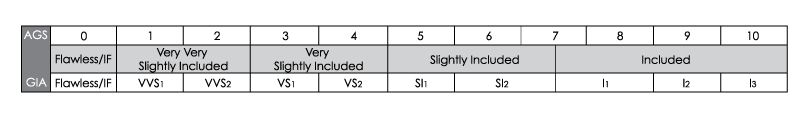

In [130]:
Image(r"C:\Users\Images\Clarity Guide.png")

In [131]:
offers.Clarity.value_counts() #This has a none

SI2     782
SI1     717
VS2     489
VS1     386
VVS2    123
VVS1     81
IF       52
I1       49
I3        2
I2        2
Name: Clarity, dtype: int64

According to the Clarity guide above, N is not a valid input and neither is None. Additionally, IF is equal to FL.

In [132]:
offers.Clarity.replace('FL', 'IF',inplace=True)
offers.Clarity.replace('None', np.NaN,inplace=True)
offers.Clarity.replace('I1', 'Included',inplace=True)
offers.Clarity.replace('I2', 'Included',inplace=True)
offers.Clarity.replace('I3', 'Included',inplace=True)
offers.Clarity.replace('None', np.NaN,inplace=True)
offers.Clarity.replace('N', np.NaN,inplace=True)

In [133]:
offers.Clarity.replace('IF', 8,inplace=True)
offers.Clarity.replace('VVS1', 7,inplace=True)
offers.Clarity.replace('VVS2', 6,inplace=True)
offers.Clarity.replace('VS1', 5,inplace=True)
offers.Clarity.replace('VS2', 4,inplace=True)
offers.Clarity.replace('SI1', 3,inplace=True)
offers.Clarity.replace('SI2', 2,inplace=True)
offers.Clarity.replace('Included', 1,inplace=True)

In [134]:
offers.Clarity.value_counts() #Non only correct descriptors remain, will replace NA's later

2    782
3    717
4    489
5    386
6    123
7     81
1     53
8     52
Name: Clarity, dtype: int64

## Color

The code for the color of the diamond

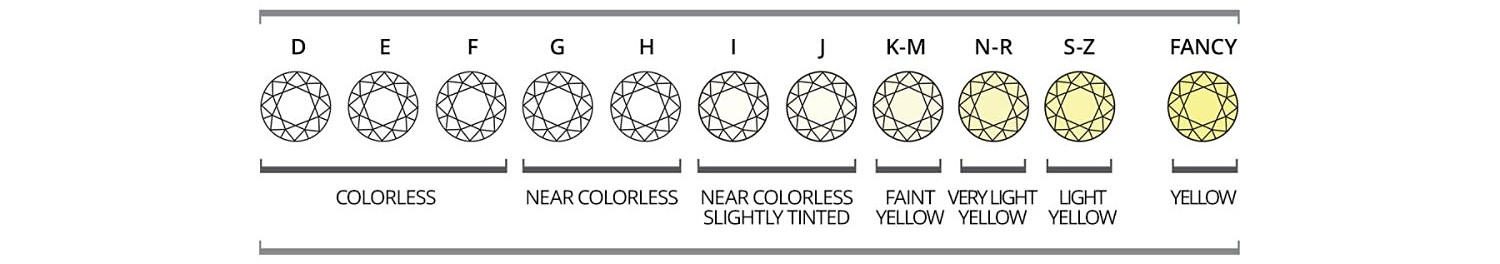

In [135]:
Image(r"C:\Users\Images\color guide.jpg")

In [136]:
offers.Color.value_counts()

G                   387
I                   360
F                   359
E                   356
H                   353
J                   303
D                   256
K                   182
L                    92
M                    29
N                     2
Ffancy darkbrown      1
S-t                   1
T                     1
Flby                  1
Name: Color, dtype: int64

In [137]:
offers.Color.replace('Fvyyelloww', 'Colored',inplace=True)
offers.Color.replace('Fly', 'Colored',inplace=True)
offers.Color.replace('Flyellow', 'Colored',inplace=True)
offers.Color.replace('Fyellow', 'Colored',inplace=True)
offers.Color.replace('Ffcly', 'Colored',inplace=True)
offers.Color.replace('Fiy', 'Colored',inplace=True)
offers.Color.replace('Fiyellow', 'Colored',inplace=True)
offers.Color.replace('Fvyellow', 'Colored',inplace=True)
offers.Color.replace('Fdy', 'Colored',inplace=True)
offers.Color.replace('Ffg', 'Colored',inplace=True)
offers.Color.replace('N', 'Colored',inplace=True)
offers.Color.replace('U', 'Colored',inplace=True)
offers.Color.replace('P', 'Colored',inplace=True)
offers.Color.replace('S', 'Colored',inplace=True)
offers.Color.replace('W', 'Colored',inplace=True)
offers.Color.replace('Ffcg', 'Colored',inplace=True)
offers.Color.replace('Ffcy', 'Colored',inplace=True)
offers.Color.replace('O-p', 'Colored',inplace=True)
offers.Color.replace('Ffcdbrown', 'Colored',inplace=True)
offers.Color.replace('Lb', 'Colored',inplace=True)
offers.Color.replace('Q-r', 'Colored',inplace=True)
offers.Color.replace('Gy', 'Colored',inplace=True)
offers.Color.replace('Fdpink', 'Colored',inplace=True)
offers.Color.replace('M', 'Colored',inplace=True)
offers.Color.replace('N', 'Colored',inplace=True)
offers.Color.replace('K', 'Colored',inplace=True)
offers.Color.replace('L', 'Colored',inplace=True)
offers.Color.replace('S-t', 'Colored',inplace=True)
offers.Color.replace('Ffancy darkbrown', 'Colored',inplace=True)
offers.Color.replace('Flby', 'Colored',inplace=True)
offers.Color.replace('T', 'Colored',inplace=True)

In [138]:
offers.Color.value_counts() #easier to manage, groups strange colors into one bin

G          387
I          360
F          359
E          356
H          353
Colored    309
J          303
D          256
Name: Color, dtype: int64

## Cut

The quality of the cut of the diamond

In [139]:
offers.Cut.value_counts() #This one has a lot of blanks

             1253
Excellent     953
Very good     391
Good           81
Fair            4
Ideal           1
Name: Cut, dtype: int64

In [140]:
offers.Cut.replace(' ', np.nan,inplace=True) #replaces blanks with Nas will deal with those later

In [141]:
offers.Cut.replace('Excellent', 4,inplace=True)
offers.Cut.replace('Very good', 3,inplace=True)
offers.Cut.replace('Good', 2,inplace=True)
offers.Cut.replace('Fair', 1,inplace=True)
offers.Cut.replace('Ideal', 5,inplace=True)

In [142]:
offers.Cut.value_counts()

4.0    953
3.0    391
2.0     81
1.0      4
5.0      1
Name: Cut, dtype: int64

## Depth

The depth percentage of the diamond

Has Null values, but no mispellings or anything, I will revisit Nulls later on

## Fluroescence

The level of fluroescence of the diamond

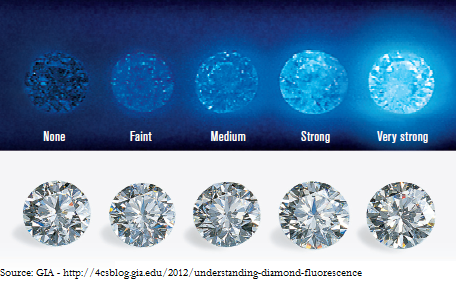

In [143]:
Image(r"C:\Users\Images\fluorescence.png")

In [144]:
offers.Fluroescence.value_counts()#This one has blanks, also a lot of these do not make sense, will have to clean up.
#For Fluroescence None is a valid input

None           1324
Faint           456
Medium          128
Medium Bl..     111
                108
Strong           74
Strong Bl..      65
Very Smal..       4
Very Stro..       2
Medium B          1
Medium Ye..       1
Name: Fluroescence, dtype: int64

In [145]:
offers.Fluroescence.replace(' ', np.nan,inplace=True) #replaces blanks with Nas will deal with those later
offers.Fluroescence.replace('Medium Bl..', 'Medium',inplace=True)
offers.Fluroescence.replace('Strong Bl..', 'Strong',inplace=True)
offers.Fluroescence.replace('Medium B', 'Medium',inplace=True)
offers.Fluroescence.replace('Medium Ye..', 'Medium',inplace=True)
offers.Fluroescence.replace('Very Stro..', 'Very Strong',inplace=True)
offers.Fluroescence.replace('Faint Y', 'Faint',inplace=True)
offers.Fluroescence.replace('Strong B', 'Strong',inplace=True)
offers.Fluroescence.replace('Very Smal..', 'Faint',inplace=True) #Best Estimation

In [146]:
offers.Fluroescence.replace('Very Strong', 5,inplace=True)
offers.Fluroescence.replace('Strong', 4,inplace=True)
offers.Fluroescence.replace('Medium', 3,inplace=True)
offers.Fluroescence.replace('Faint', 2,inplace=True)
offers.Fluroescence.replace('None', 1,inplace=True)

In [147]:
offers.Fluroescence.value_counts()

1.0    1324
2.0     460
3.0     241
4.0     139
5.0       2
Name: Fluroescence, dtype: int64

## Conflict Diamond

A flag identifying if the diamond was known to have been illegally traded

In [148]:
offers.Known_Conflict_Diamond.value_counts()

False    259
True      46
Name: Known_Conflict_Diamond, dtype: int64

Simple Boolean, no problems here

## Measurements

The length x width x depth of the diamond expressed in millimeters

Going to split this into 3 columns

In [149]:
def replace_char(string):
    s = string.replace("+","x")
    s = s.replace("-","x")
    s = s.replace("*","x")
    s = s.replace("X","x")
    s = s.replace('+',"x")
    s = s.replace("-","x")
    s = s.replace("*","x")
    s = s.replace("X","x")
    return s

Creating 3 functions to split up the measurements column

In [150]:
def split(string):
    s = replace_char(string)
    t = s.split('x')[0]
    return t
def split2(string):
    s = replace_char(string)
    t = s.split('x')[1]
    return t
def split3(string):
    s = replace_char(string)
    t = s.split('x')[2]
    return t

In [151]:
offers['l'] = offers['Measurements'].apply(split)
offers['w'] = offers['Measurements'].apply(split2)
offers['d'] = offers['Measurements'].apply(split3)

In [152]:
offers['l'] = offers['l'].apply(pd.to_numeric, errors='coerce')
offers['w'] = offers['w'].apply(pd.to_numeric, errors='coerce')
offers['d'] = offers['d'].apply(pd.to_numeric, errors='coerce')

In [153]:
offers.drop(["Measurements"],axis=1, inplace = True) #no longer need the measurments column

## Polish

The quality of the polish of the diamond

In [154]:
offers.Polish.value_counts() #Has Blanks

Excellent    1781
Very good     539
              291
Good           70
Fair            2
Name: Polish, dtype: int64

In [155]:
offers.Polish.replace(' ', np.nan,inplace=True) #replaces blanks with Nas will deal with those later

In [156]:
offers.Polish.replace('Good', 2,inplace=True)
offers.Polish.replace('Very good', 3,inplace=True)
offers.Polish.replace('Excellent', 4,inplace=True)
offers.Polish.replace('Fair', 1,inplace=True)

In [157]:
offers.Polish.value_counts()

4.0    1781
3.0     539
2.0      70
1.0       2
Name: Polish, dtype: int64

## Regions

The region from which the diamond originated

In [158]:
offers.Regions.value_counts()

Russia           896
Botswana         445
Australia        297
DR Congo         283
Canada           261
Angola           182
South Africa     174
Other/Unknown     91
Zimbabwe          54
Name: Regions, dtype: int64

Don't see any issues here

## Shape

The shape the diamond was cut into

In [159]:
offers.Shape.value_counts() #Has Round and ROUND, Marquise, Marquise, and Marquis, Oval and Oval with a space

Round       1489
Princess     252
Emerald      196
Oval         183
Radiant      170
Pear          92
Marquise      89
Asscher       76
Oval          50
ROUND         31
Cushion       26
Uncut         12
Marquis        9
Marwuise       8
Name: Shape, dtype: int64

In [160]:
offers.Shape.replace('ROUND', 'Round',inplace=True)
offers.Shape.replace('Oval ', 'Oval',inplace=True)
offers.Shape.replace('Marwuise', 'Marquise',inplace=True)
offers.Shape.replace('ROUND', 'Round',inplace=True)
offers.Shape.replace('Marquis', 'Marquise',inplace=True)

In [161]:
offers.Shape.value_counts()

Round       1520
Princess     252
Oval         233
Emerald      196
Radiant      170
Marquise     106
Pear          92
Asscher       76
Cushion       26
Uncut         12
Name: Shape, dtype: int64

## Symmetry

The quality of the symmetry of the diamond

In [162]:
offers.Symmetry.value_counts()

Excellent    1542
Very good     677
              291
Good          166
Fair            6
Faint           1
Name: Symmetry, dtype: int64

In [163]:
offers.Symmetry.replace(' ', np.nan,inplace=True) #replaces blanks with Nas will deal with those later
offers.Symmetry.replace('Execllent', 'Excellent',inplace=True)

In [164]:
offers.Symmetry.replace('Excellent', 5,inplace=True)
offers.Symmetry.replace('Very good', 4,inplace=True)
offers.Symmetry.replace('Good', 3,inplace=True)
offers.Symmetry.replace('Fair', 2,inplace=True)
offers.Symmetry.replace('Faint', 1,inplace=True)

In [165]:
offers.Symmetry.value_counts()

5.0    1542
4.0     677
3.0     166
2.0       6
1.0       1
Name: Symmetry, dtype: int64

## Table

The table percentage of the diamond

Has Null values, but no mispellings or anything, I will revisit Nulls later on

In [166]:
offers['Table'] = offers['Table'].apply(pd.to_numeric, errors='coerce')

## Vendor

The vendor selling the diamond

In [167]:
offers.Vendor.replace(1, 'A',inplace=True)
offers.Vendor.replace(2, 'B',inplace=True)
offers.Vendor.replace(3, 'C',inplace=True)
offers.Vendor.replace(4, 'D',inplace=True)

## Dealing with Missing Values

Recall that columns cert, depth, fluroescence, and table have missing values

,Total,Percent
Offers,2683,100.000000
Known_Conflict_Diamond,2378,88.632128
Cut,1253,46.701454
Table,856,31.904584
Fluroescence,517,19.269474
Depth,497,18.524040
Polish,291,10.846068
Symmetry,291,10.846068


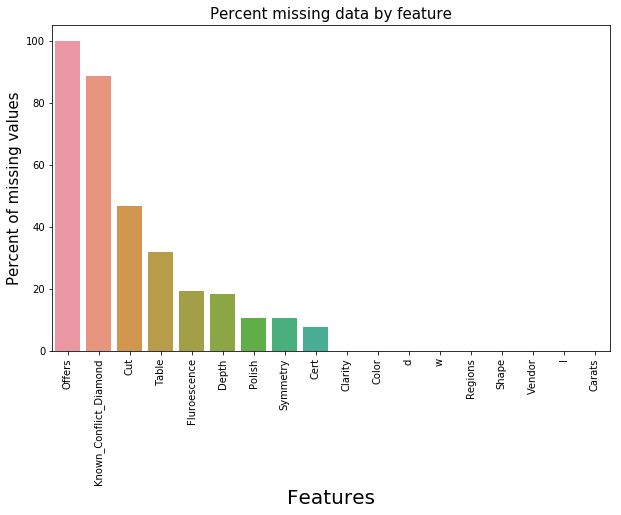

In [168]:
total = offers.isnull().sum().sort_values(ascending=False)
percent = (offers.isnull().sum()/offers.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head(8)

In [169]:
offers.drop(['Offers','Known_Conflict_Diamond'],axis=1, inplace = True) #offer will be a predictor and Known_conflict diamond has too many missing variables to be useful

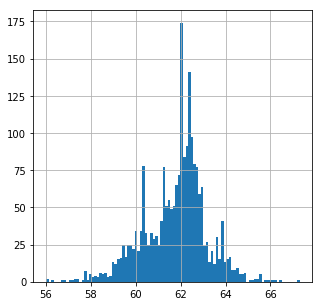

In [170]:
p = offers.Depth.hist(figsize = (5,5),bins=100)  #Plotting a histogram to examine the distribution

In [171]:
mean = offers.Depth.mean()
std = offers.Depth.std()
med = offers.Depth.median()
mode = offers.Depth.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

Mean: 61.7816559926807
Median: 62.0
Mode: 0    62.4
dtype: float64
Standard Deviation: 1.3896930838919583


Replacing Nulls with data within one std of mean

In [172]:
Column_Name_avg = offers['Depth'].mean()
Column_Name_std = offers['Depth'].std()
Column_Name_null_count = offers['Depth'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
offers['Depth'][np.isnan(offers['Depth'])] = Column_Name_null_random_list
offers['Depth'] = offers['Depth'].astype(float)

C:\Users\bdraus\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


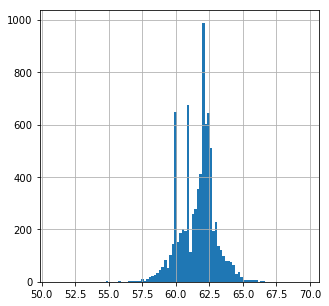

In [173]:
p = training.Depth.hist(figsize = (5,5),bins=100)  #New Distribution

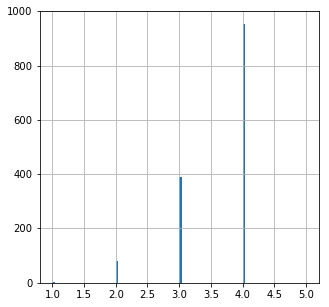

In [174]:
p = offers.Cut.hist(figsize = (5,5),bins=100)

In [175]:
mean = offers.Cut.mean()
std = offers.Cut.std()
med = offers.Cut.median()
mode = offers.Cut.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))
offers.Cut.fillna(offers.Cut.mean(),inplace=True)

Mean: 3.6055944055944056
Median: 4.0
Mode: 0    4.0
dtype: float64
Standard Deviation: 0.6087507684424264


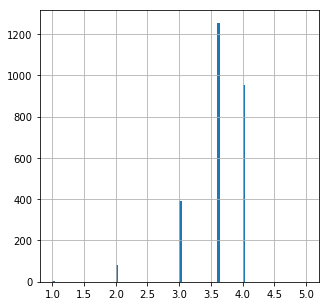

In [176]:
p = offers.Cut.hist(figsize = (5,5),bins=100)

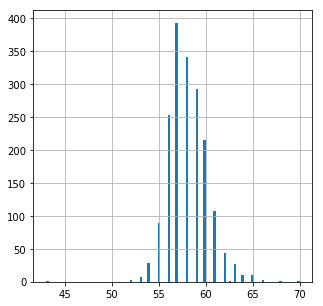

In [177]:
p = offers.Table.hist(figsize = (5,5),bins=100)  #Plotting a histogram to examine the distribution

We see the same thing happening with Table Percentage where 0 is Null

In [178]:
offers.Table.replace(0,np.NaN,inplace=True)

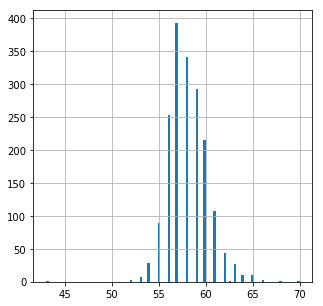

In [179]:
p = offers.Table.hist(figsize = (5,5),bins=100)  #rexamining distribution

Again this is a pretty normal distribution

In [180]:
mean = offers.Table.mean()
std = offers.Table.std()
med = offers.Table.median()
mode = offers.Table.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

Mean: 58.10432402846196
Median: 58.0
Mode: 0    57.0
dtype: float64
Standard Deviation: 2.081219922000614


In [181]:
Column_Name_avg = offers['Table'].mean()
Column_Name_std = offers['Table'].std()
Column_Name_null_count = offers['Table'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
offers['Table'][np.isnan(offers['Table'])] = Column_Name_null_random_list
offers['Table'] = offers['Table'].astype(float)

C:\Users\bdraus\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


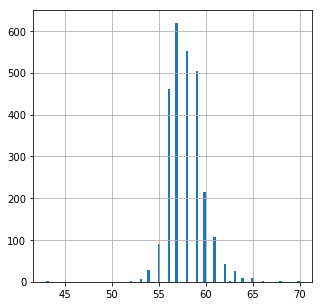

In [182]:
p = offers.Table.hist(figsize = (5,5),bins=100) #new distribution for Table

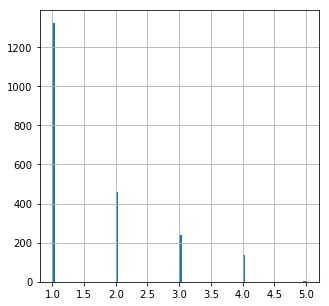

In [183]:
p = offers.Fluroescence.hist(figsize = (5,5),bins=100)

In [184]:
mean = offers.Fluroescence.mean()
std = offers.Fluroescence.std()
med = offers.Fluroescence.median()
mode = offers.Fluroescence.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

offers.Fluroescence.fillna(offers.Fluroescence.mean(),inplace=True)

Mean: 1.631117266851339
Median: 1.0
Mode: 0    1.0
dtype: float64
Standard Deviation: 0.92295906700129


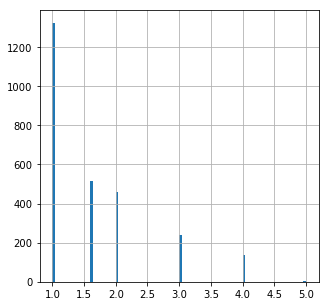

In [185]:
p = offers.Fluroescence.hist(figsize = (5,5),bins=100)

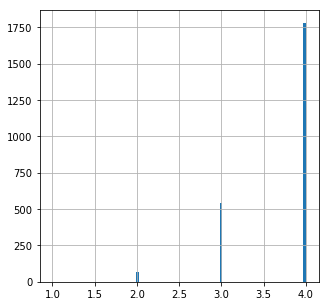

In [186]:
p = offers.Polish.hist(figsize = (5,5),bins=100)

In [187]:
mean = offers.Polish.mean()
std = offers.Polish.std()
med = offers.Polish.median()
mode = offers.Polish.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

offers.Polish.fillna(offers.Polish.mean(),inplace=True)

Mean: 3.713628762541806
Median: 4.0
Mode: 0    4.0
dtype: float64
Standard Deviation: 0.5177064330206168


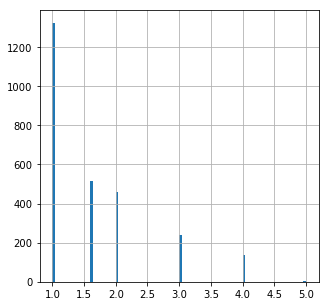

In [188]:
p = offers.Fluroescence.hist(figsize = (5,5),bins=100) #reaximining distribution

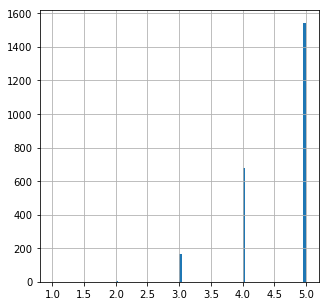

In [189]:
p = offers.Symmetry.hist(figsize = (5,5),bins=100)

In [190]:
mean = offers.Symmetry.mean()
std = offers.Symmetry.std()
med = offers.Symmetry.median()
mode = offers.Symmetry.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

offers.Symmetry.fillna(offers.Symmetry.mean(),inplace=True)

Mean: 4.568979933110368
Median: 5.0
Mode: 0    5.0
dtype: float64
Standard Deviation: 0.6358251770793278


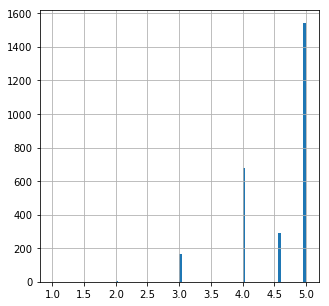

In [191]:
p = offers.Symmetry.hist(figsize = (5,5),bins=100) #reaximining distribution

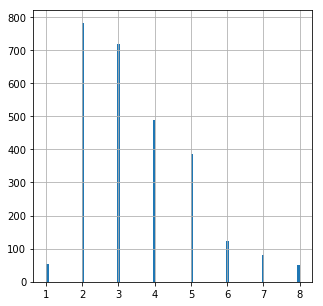

In [192]:
p = offers.Clarity.hist(figsize = (5,5),bins=100)

In [193]:
mean = offers.Clarity.mean()
std = offers.Clarity.std()
med = offers.Clarity.median()
mode = offers.Clarity.mode()

print('Mean: '+str(mean))
print('Median: '+str(med))
print('Mode: '+str(mode))
print('Standard Deviation: '+str(std))

offers.Clarity.fillna(offers.Clarity.mean(),inplace=True)

Mean: 3.4942228848304135
Median: 3.0
Mode: 0    2
dtype: int64
Standard Deviation: 1.50498307951209


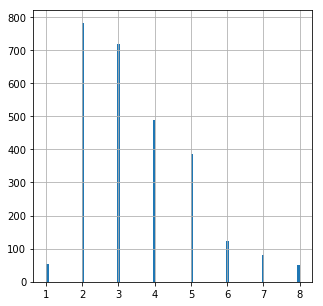

In [194]:
p = offers.Clarity.hist(figsize = (5,5),bins=100)

In [195]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 16 columns):
Carats          2683 non-null float64
Cert            2470 non-null object
Clarity         2683 non-null int64
Color           2683 non-null object
Cut             2683 non-null float64
Depth           2683 non-null float64
Fluroescence    2683 non-null float64
Polish          2683 non-null float64
Regions         2683 non-null object
Shape           2683 non-null object
Symmetry        2683 non-null float64
Table           2683 non-null float64
Vendor          2683 non-null object
l               2683 non-null float64
w               2683 non-null float64
d               2683 non-null float64
dtypes: float64(10), int64(1), object(5)
memory usage: 335.5+ KB


In [196]:
offers.columns

Index(['Carats', 'Cert', 'Clarity', 'Color', 'Cut', 'Depth', 'Fluroescence',
       'Polish', 'Regions', 'Shape', 'Symmetry', 'Table', 'Vendor', 'l', 'w',
       'd'],
      dtype='object')

Non I will examin missing Categorical features and their distributions

C:\Users\bdraus\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


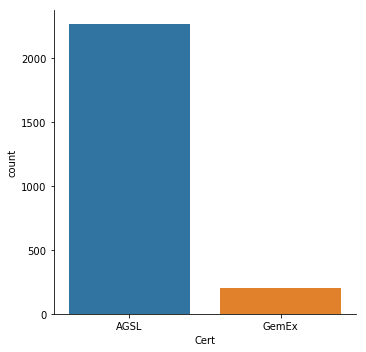

In [197]:
p = sns.factorplot(x='Cert', data=offers , kind='count',aspect=1 )

You can see that AGSL is far more frequent than GemEx so I fill will missing values with the mode.

In [198]:
offers['Cert'] = offers['Cert'].fillna(offers.Cert.mode().iloc[0])

In [199]:
offers.info() # All data is non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 16 columns):
Carats          2683 non-null float64
Cert            2683 non-null object
Clarity         2683 non-null int64
Color           2683 non-null object
Cut             2683 non-null float64
Depth           2683 non-null float64
Fluroescence    2683 non-null float64
Polish          2683 non-null float64
Regions         2683 non-null object
Shape           2683 non-null object
Symmetry        2683 non-null float64
Table           2683 non-null float64
Vendor          2683 non-null object
l               2683 non-null float64
w               2683 non-null float64
d               2683 non-null float64
dtypes: float64(10), int64(1), object(5)
memory usage: 335.5+ KB


## Create Dummy Variables for Categorical Data

In [200]:
cats = ['Cert','Color','Regions','Shape','Vendor']

In [201]:
dummies = pd.get_dummies(offers[cats])

In [202]:
merged = pd.concat([offers,dummies], axis='columns')

In [203]:
merged.drop(cats,axis=1, inplace = True)

## Data Scaling

next I want to scale the data so it easier to compare across features

In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
scale = StandardScaler()

In [206]:
cols = ['Carats', 'Clarity', 'Cut', 'Depth', 'Fluroescence', 'Polish',
       'Symmetry', 'Table','l', 'w', 'd']

In [207]:
num_feats =  pd.DataFrame(scale.fit_transform(merged[cols]),
                           columns=cols,index=merged.index)

In [208]:
num_feats.head() #puts all the features on the same scale

,Carats,Clarity,Cut,Depth,Fluroescence,Polish,Symmetry,Table,l,w,d
0,-0.945638,-0.993035,9.995969e-16,0.791781,-7.612179e-01,0.585958,0.718092,-0.492938,-1.389561,-1.410584,-0.821382
1,-0.968024,0.336131,9.995969e-16,1.616800,-7.612179e-01,0.585958,0.718092,0.588639,-1.517824,-1.537556,-0.865255
2,-0.956831,-0.993035,9.995969e-16,0.416772,-7.612179e-01,0.585958,-0.947938,0.047851,-1.427286,-1.440460,-0.865255
3,-0.968024,-0.328452,9.995969e-16,1.916807,2.857212e+00,-1.460190,-0.947938,0.047851,-1.525369,-1.552494,-0.857943
4,-0.968024,0.336131,9.995969e-16,1.991808,2.678176e-16,0.585958,-0.947938,-1.033726,-1.495190,-1.530087,-0.836006


In [209]:
merged_stand = merged.copy(deep=True)
merged_stand[cols] = num_feats[cols] #combining the new standardized numeric features with the categorical data

In [210]:
merged_stand.head()

,Carats,Clarity,Cut,Depth,Fluroescence,Polish,Symmetry,Table,l,w,...,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_A,Vendor_B,Vendor_C,Vendor_D
0,-0.945638,-0.993035,9.995969e-16,0.791781,-7.612179e-01,0.585958,0.718092,-0.492938,-1.389561,-1.410584,...,0,0,0,0,1,0,1,0,0,0
1,-0.968024,0.336131,9.995969e-16,1.616800,-7.612179e-01,0.585958,0.718092,0.588639,-1.517824,-1.537556,...,0,0,0,0,1,0,1,0,0,0
2,-0.956831,-0.993035,9.995969e-16,0.416772,-7.612179e-01,0.585958,-0.947938,0.047851,-1.427286,-1.440460,...,0,0,0,0,1,0,1,0,0,0
3,-0.968024,-0.328452,9.995969e-16,1.916807,2.857212e+00,-1.460190,-0.947938,0.047851,-1.525369,-1.552494,...,0,0,0,0,0,0,1,0,0,0
4,-0.968024,0.336131,9.995969e-16,1.991808,2.678176e-16,0.585958,-0.947938,-1.033726,-1.495190,-1.530087,...,0,0,0,0,1,0,1,0,0,0


In [211]:
final = merged_stand.copy()

In [212]:
last = final.copy()

In [213]:
last['Price']=rf.predict(final)
last['Retail']=rf_retail.predict(final)

In [214]:
last.head()

,Carats,Clarity,Cut,Depth,Fluroescence,Polish,Symmetry,Table,l,w,...,Shape_Princess,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_A,Vendor_B,Vendor_C,Vendor_D,Price,Retail
0,-0.945638,-0.993035,9.995969e-16,0.791781,-7.612179e-01,0.585958,0.718092,-0.492938,-1.389561,-1.410584,...,0,0,1,0,1,0,0,0,626.0,1115.0
1,-0.968024,0.336131,9.995969e-16,1.616800,-7.612179e-01,0.585958,0.718092,0.588639,-1.517824,-1.537556,...,0,0,1,0,1,0,0,0,624.0,1127.5
2,-0.956831,-0.993035,9.995969e-16,0.416772,-7.612179e-01,0.585958,-0.947938,0.047851,-1.427286,-1.440460,...,0,0,1,0,1,0,0,0,633.5,1121.0
3,-0.968024,-0.328452,9.995969e-16,1.916807,2.857212e+00,-1.460190,-0.947938,0.047851,-1.525369,-1.552494,...,0,0,0,0,1,0,0,0,636.5,958.0
4,-0.968024,0.336131,9.995969e-16,1.991808,2.678176e-16,0.585958,-0.947938,-1.033726,-1.495190,-1.530087,...,0,0,1,0,1,0,0,0,639.0,1155.0


In [215]:
last['Proj Profit'] = last['Retail']-last['Price']

In [216]:
last.head()

,Carats,Clarity,Cut,Depth,Fluroescence,Polish,Symmetry,Table,l,w,...,Shape_Radiant,Shape_Round,Shape_Uncut,Vendor_A,Vendor_B,Vendor_C,Vendor_D,Price,Retail,Proj Profit
0,-0.945638,-0.993035,9.995969e-16,0.791781,-7.612179e-01,0.585958,0.718092,-0.492938,-1.389561,-1.410584,...,0,1,0,1,0,0,0,626.0,1115.0,489.0
1,-0.968024,0.336131,9.995969e-16,1.616800,-7.612179e-01,0.585958,0.718092,0.588639,-1.517824,-1.537556,...,0,1,0,1,0,0,0,624.0,1127.5,503.5
2,-0.956831,-0.993035,9.995969e-16,0.416772,-7.612179e-01,0.585958,-0.947938,0.047851,-1.427286,-1.440460,...,0,1,0,1,0,0,0,633.5,1121.0,487.5
3,-0.968024,-0.328452,9.995969e-16,1.916807,2.857212e+00,-1.460190,-0.947938,0.047851,-1.525369,-1.552494,...,0,0,0,1,0,0,0,636.5,958.0,321.5
4,-0.968024,0.336131,9.995969e-16,1.991808,2.678176e-16,0.585958,-0.947938,-1.033726,-1.495190,-1.530087,...,0,1,0,1,0,0,0,639.0,1155.0,516.0


In [217]:
last.to_csv(r'C:\Users\Temp\output.csv')

In [218]:
bid = []
retail = []
profit = []

In [219]:
bid = last['Price']
retail = last['Retail']
profit = last['Proj Profit']


In [240]:
output = pd.read_csv(r"C:\Users\Temp\offers.csv", engine='python')

In [241]:
output = output.rename(columns = {'Unnamed: 0': 'ID'})

In [242]:
output['Price']  = bid
output['Retail']  = retail
output['Proj Profit']  = profit

In [243]:
output.head()

,ID,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers,Price,Retail,Proj Profit
0,1,0.42,AGSL,SI2,L,,62.7,None,NaN,4.81x4.78x3.01,Excellent,Australia,Round,Excellent,57.0,1,NaN,626.0,1115.0,489.0
1,6,0.40,GemEx,VS2,M,,63.8,None,NaN,4.64x4.61x2.95,Excellent,Australia,Round,Excellent,59.0,1,NaN,624.0,1127.5,503.5
2,7,0.41,AGSL,SI2,L,,62.2,None,True,4.76x4.74x2.95,Excellent,DR Congo,Round,Very good,58.0,1,NaN,633.5,1121.0,487.5
3,8,0.40,AGSL,SI1,K,,64.2,Strong Bl..,False,4.63x4.59x2.96,Very good,Angola,Emerald,Very good,58.0,1,NaN,636.5,958.0,321.5
4,9,0.40,AGSL,VS2,L,,64.3,NaN,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,NaN,639.0,1155.0,516.0


In [244]:
output.sort_values(by='Proj Profit', ascending=False,inplace=True)

In [245]:
output['Profit Perc'] = (output['Retail']/output['Price']-1)

In [246]:
output.sort_values(by='Profit Perc', ascending=False,inplace=True)

In [247]:
output.to_csv(r'C:\Users\output.csv')

Finally I went into the excel document and selected my offers based on largest potential profit, I looked projected retail price and chose the diamonds where the prjected retail price was the greatest % over the projected price.

Then I took the price for those diamonds and upped it by 10% in order to get a better chance of it not being rejected. Using percentage allows me to bid on more diamonds then sorting just by projected profit volume.